In [227]:
### Lire les données du fichier CSV ‘dataset-sell4all.csv’ qui contient les données
### démographiques et de dépenses des utilisateurs

import pandas as pd
df = pd.read_csv('Downloads/data-sell4all.csv')
print(df.to_string())


                 Pays           Age            Genre Dépenses des clients
0              France             32          Female               150.50
1             Germany             45            Male               200.75
2               Spain             28          Female                75.25
3               Italy             39            Male               180.00
4                  UK             52          Female               250.30
5              France             22            Male                90.00
6             Germany             36          Female               175.50
7               Spain             41            Male               120.75
8               Italy             29          Female                95.25
9                  UK             48            Male               220.00
10             France             35          Female               160.25
11            Germany             27            Male                85.50
12              Spain             50  

In [5]:
### Afficher des informations sur les 5 premières lignes du fichier CSV

import pandas as pd
df = pd.read_csv('Downloads/data-sell4all.csv')
print(df.head().to_string())


      Pays  Age    Genre Dépenses des clients
0   France    32  Female               150.50
1  Germany    45    Male               200.75
2    Spain    28  Female                75.25
3    Italy    39    Male               180.00
4       UK    52  Female               250.30


In [40]:
### Afficher un résumé technique des données disponibles dans le fichier CSV avec des
### informations telles que :
##### nombre de lignes
##### les colonnes du fichier CSV
##### les types de données des champs du fichier CSV

import pandas as pd

df = pd.read_csv('Downloads/data-sell4all.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Pays                  65 non-null     object
 1    Age                  63 non-null     object
 2   Genre                 64 non-null     object
 3   Dépenses des clients  64 non-null     object
dtypes: object(4)
memory usage: 2.2+ KB
None


 Expliquer les détails affichés du résumé technique dans une cellule de démarque du
 bloc-notes Jupyter

# nombre de lignes: 65
# les colonnes du fichier CSV: 4 colonnes = [Pays, Age, Genre, Dépenses des clients]
# les types de données des champs du fichier CSV: object

In [148]:
### Calculer la médiane et la moyenne des colonnes :
### « Âge »
### « Dépenses des clients »

import pandas as pd

df = pd.read_csv('Downloads/data-sell4all.csv')

#### Age Median ####

# rename ' Age ' to 'Age'
df.rename(columns = {' Age ': 'Age'}, inplace = True)

# Convert the 'Age' column to numeric type; set non-numeric values to NaN
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

# Filter out rows where Age is less than or equal to 0 or greater than 100
df = df[(df['Age'] > 0) & (df['Age'] < 100)]

# Convert 'Age' to integer (this will remove the decimal points)
df['Age'] = df['Age'].astype(int)

# calculate the median age
median_age = df[ 'Age' ].median().astype(int)
print(median_age)

### Dépenses des clients Median ### 

# Convert the 'Dépenses des clients' column to numeric type; set non-numeric values to NaN
df["Dépenses des clients"] = pd.to_numeric(df["Dépenses des clients"], errors="coerce")

# removes any rows in df where the value in the column 'Dépenses des clients' is missing (NaN).
df.dropna(subset=['Dépenses des clients'], inplace = True)

# calculate the median age
ddc = df['Dépenses des clients'].median()
print(ddc)

36
165.0


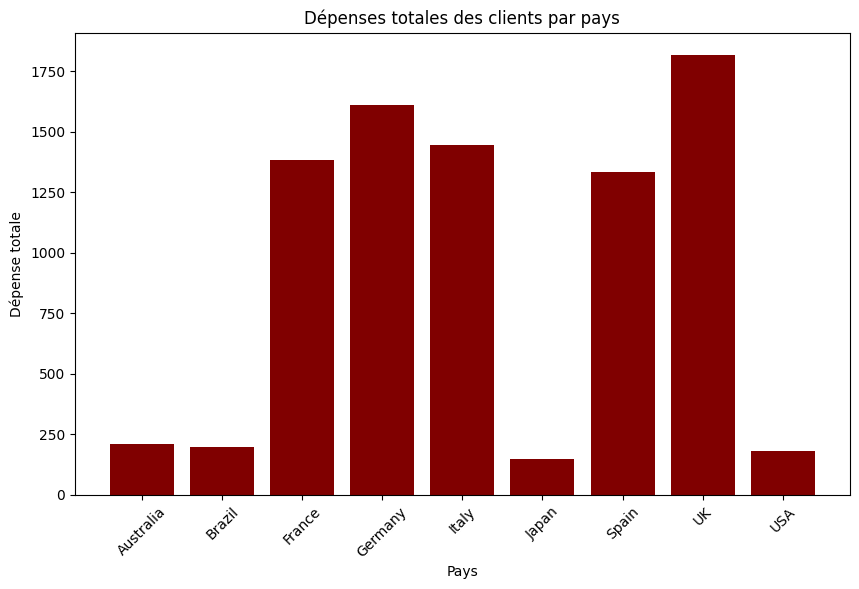

In [201]:
### Créer une visualisation des données du graphique à barres qui montre les dépenses
### des clients par pays

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Downloads/data-sell4all.csv')

# rename ' Age ' to 'Age'
df.rename(columns = {' Age ': 'Age'}, inplace = True)

# Convert the 'Age' column to numeric type; set non-numeric values to NaN
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

# Filter out rows where Age is less than or equal to 0 or greater than 100
df = df[(df['Age'] > 0) & (df['Age'] < 100)]

# Convert 'Age' to integer (this will remove the decimal points)
df['Age'] = df['Age'].astype(int)

# Convert the 'Dépenses des clients' column to numeric type; set non-numeric values to NaN
df["Dépenses des clients"] = pd.to_numeric(df["Dépenses des clients"], errors="coerce")

# removes any rows in df where the value in the column 'Dépenses des clients' is missing (NaN).
df.dropna(subset=['Dépenses des clients'], inplace = True)

df = df.groupby('Pays')['Dépenses des clients'].sum()
#print(df.reset_index().to_string())

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(df.index, df.values, color='maroon')

# Adding titles and labels
plt.title('Dépenses totales des clients par pays')
plt.xlabel('Pays')
plt.ylabel('Dépense totale')

# Optional: Rotate the x labels for better readability if necessary
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [208]:
### Nettoyer les lignes avec moins de 10 € de dépenses client : supprimez toutes les
### lignes d’utilisateurs ayant dépensé moins de 10 € sur le site

import pandas as pd

df = pd.read_csv('Downloads/data-sell4all.csv')

# rename ' Age ' to 'Age'
df.rename(columns = {' Age ': 'Age'}, inplace = True)

# Convert the 'Age' column to numeric type; set non-numeric values to NaN
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

# Filter out rows where Age is less than or equal to 0 or greater than 100
df = df[(df['Age'] > 0) & (df['Age'] < 100)]

# Convert 'Age' to integer (this will remove the decimal points)
df['Age'] = df['Age'].astype(int)

# Convert the 'Dépenses des clients' column to numeric type; set non-numeric values to NaN
df["Dépenses des clients"] = pd.to_numeric(df["Dépenses des clients"], errors="coerce")

# removes any rows in df where the value in the column 'Dépenses des clients' is missing (NaN).
df.dropna(subset=['Dépenses des clients'], inplace = True)

# Filter out rows where 'Dépenses des clients' is less than 10
df = df[(df['Dépenses des clients'] >= 10)]

print(df.to_string())


         Pays  Age   Genre  Dépenses des clients
0      France   32  Female                150.50
1     Germany   45    Male                200.75
2       Spain   28  Female                 75.25
3       Italy   39    Male                180.00
4          UK   52  Female                250.30
5      France   22    Male                 90.00
6     Germany   36  Female                175.50
7       Spain   41    Male                120.75
8       Italy   29  Female                 95.25
9          UK   48    Male                220.00
10     France   35  Female                160.25
11    Germany   27    Male                 85.50
12      Spain   50  Female                190.75
13      Italy   33    Male                140.00
14         UK   44  Female                210.50
15     France   31    Male                130.25
16    Germany   38  Female                170.00
18      Italy   47  Female                200.25
19         UK   30    Male                110.50
20     France   42  

In [222]:
### Nettoyer les doublons : supprimer toutes les lignes qui apparaissent plus d’une fois
### dans les données

import pandas as pd

df = pd.read_csv('Downloads/data-sell4all.csv')

# rename ' Age ' to 'Age'
df.rename(columns = {' Age ': 'Age'}, inplace = True)

# Convert the 'Age' column to numeric type; set non-numeric values to NaN
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

# Filter out rows where Age is less than or equal to 0 or greater than 100
df = df[(df['Age'] > 0) & (df['Age'] < 100)]

# Convert 'Age' to integer (this will remove the decimal points)
df['Age'] = df['Age'].astype(int)

# Convert the 'Dépenses des clients' column to numeric type; set non-numeric values to NaN
df["Dépenses des clients"] = pd.to_numeric(df["Dépenses des clients"], errors="coerce")

# removes any rows in df where the value in the column 'Dépenses des clients' is missing (NaN).
df.dropna(subset=['Dépenses des clients'], inplace = True)

# Filter out rows where 'Dépenses des clients' is less than 10
df = df[(df['Dépenses des clients'] >= 10)]

# removes any rows in df where the value in the column 'Genre' is missing (NaN).
df.dropna(subset=['Genre'], inplace = True)

df.drop_duplicates(inplace=True)

print(df.to_string())

         Pays  Age   Genre  Dépenses des clients
0      France   32  Female                150.50
1     Germany   45    Male                200.75
2       Spain   28  Female                 75.25
3       Italy   39    Male                180.00
4          UK   52  Female                250.30
5      France   22    Male                 90.00
6     Germany   36  Female                175.50
7       Spain   41    Male                120.75
8       Italy   29  Female                 95.25
9          UK   48    Male                220.00
10     France   35  Female                160.25
11    Germany   27    Male                 85.50
12      Spain   50  Female                190.75
13      Italy   33    Male                140.00
14         UK   44  Female                210.50
15     France   31    Male                130.25
16    Germany   38  Female                170.00
18      Italy   47  Female                200.25
19         UK   30    Male                110.50
21    Germany   29  

In [223]:
### Écrire les données nettoyées dans un nouveau fichier CSV avec uniquement les
### colonnes suivantes :
##### « Pays »
##### « Âge »
##### « Genre »
#####« Dépenses des clients »

import pandas as pd

df = pd.read_csv('Downloads/data-sell4all.csv')

# rename ' Age ' to 'Age'
df.rename(columns = {' Age ': 'Age'}, inplace = True)

# Convert the 'Age' column to numeric type; set non-numeric values to NaN
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

# Filter out rows where Age is less than or equal to 0 or greater than 100
df = df[(df['Age'] > 0) & (df['Age'] < 100)]

# Convert 'Age' to integer (this will remove the decimal points)
df['Age'] = df['Age'].astype(int)

# Convert the 'Dépenses des clients' column to numeric type; set non-numeric values to NaN
df["Dépenses des clients"] = pd.to_numeric(df["Dépenses des clients"], errors="coerce")

# removes any rows in df where the value in the column 'Dépenses des clients' is missing (NaN).
df.dropna(subset=['Dépenses des clients'], inplace = True)

# Filter out rows where 'Dépenses des clients' is less than 10
df = df[(df['Dépenses des clients'] >= 10)]

# removes any rows in df where the value in the column 'Genre' is missing (NaN).
df.dropna(subset=['Genre'], inplace = True)

df.drop_duplicates(inplace=True)

df.to_csv('Downloads/cleaning-data.csv', sep=',', index=False, encoding='utf-8')

In [225]:
import pandas as pd

df = pd.read_csv('Downloads/cleaning-data.csv')
print(df.to_string())
#print(df.info())

         Pays  Age   Genre  Dépenses des clients
0      France   32  Female                150.50
1     Germany   45    Male                200.75
2       Spain   28  Female                 75.25
3       Italy   39    Male                180.00
4          UK   52  Female                250.30
5      France   22    Male                 90.00
6     Germany   36  Female                175.50
7       Spain   41    Male                120.75
8       Italy   29  Female                 95.25
9          UK   48    Male                220.00
10     France   35  Female                160.25
11    Germany   27    Male                 85.50
12      Spain   50  Female                190.75
13      Italy   33    Male                140.00
14         UK   44  Female                210.50
15     France   31    Male                130.25
16    Germany   38  Female                170.00
17      Italy   47  Female                200.25
18         UK   30    Male                110.50
19    Germany   29  